<div class="titlebox">
    <h2>Final Project Submission</h2>
    <li>Student name: <b>Samuel Stoltenberg</b></li>
    <li>Student pace: <b>full time</b></li>
    <li>Scheduled project review date/time: <b></b></li>
    <li>Instructor name: <b>James Irving</b></li>
    <li>Blog Post: <a href="https://skelouse.github.io/linear_regression_model_from_a_distance"> <b>Linear Regression Model From a Distance</b></a></li>
<blockquote>
    This project was done with the OSEMN process
    <li><b>O</b>btain</li>
    <li><b>S</b>crub</li>
    <li><b>E</b>xplore</li>
    <li><b>M</b>odel</li>
    <li>i<b>N</b>terpret</li>
    
</blockquote>
</div>



<div class="titlebox">
    <h3>HTML and matplotlib styling</h3>
</div>

In [30]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

In [2]:
import matplotlib as mpl
mpl.rcParams['axes.titlesize']='xx-large'
mpl.rcParams['xtick.labelsize'] = 13
mpl.rcParams['ytick.labelsize'] = 13
mpl.rcParams['axes.labelsize'] = 16

<div class="titlebox">
    <h2>Importing Libraries and Data</h2>
    <blockquote>
        <p> MLFrame is from my own library, which is included in this <a
                href="https://github.com/skelouse/mod-2-project/tree/master/mltools">Repository</a>
            <li>Inherits from pd.DataFrame</li>
            <li>Has methods for use in linear regression and data cleaning</li>
        </p>
    </blockquote>
slow = False ( Skip large graphs and modelings )
    <br>
slow = True ( Run large graphs and modelings )
</div>

In [3]:
slow = True
import warnings
warnings.filterwarnings('ignore')

<div class="titlebox">
    <h3>Importing libraries and data</h3>
</div>

In [4]:
import pandas as pd
import numpy as np
from numbers import Number
from mltools.mlframe import MLFrame
pd.set_option('display.max_columns',0)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Using MLFrame as a wrapper for a pd.DataFrame
df = MLFrame(pd.read_csv('kc_house_data.csv'))

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,nan,0.000,3,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,3,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,3,6,770,0.0,1933,nan,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,5,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,3,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503


In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19221.000,21534.000,21597.000,21597.000,21597.000,21597.000,17755.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,540296.574,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,1788.597,1971.000,83.637,98077.952,47.560,-122.214,1986.620,12758.284
std,2876735715.748,367368.140,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,827.760,29.375,399.946,53.513,0.139,0.141,685.230,27274.442
min,1000102.000,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2123049175.000,322000.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3904930410.000,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000
75%,7308900490.000,645000.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,2210.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,9900000190.000,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


In [7]:
df.info()

Model is None

<class 'mltools.mlframe.MLFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64


<div class="titlebox">
<h3>Base model</h3>
</div>

In [8]:
help(df.model_and_plot)

Help on method model_and_plot in module mltools.mlframe:

model_and_plot(target, figsize=(10, 10), **kwargs) method of mltools.mlframe.MLFrame instance
    Creates a new model based on target, plots a
    scatter plot of (target, model residuals), and
    plots a qqplot based on the model residuals.
    
    Parameters
    ----------------------------------------
    target::[str]
        The target for which to model on
    kwargs{dict}::
        Arguments that are sent to Model.from_formula()
        see:
    https://www.statsmodels.org/stable/generated/statsmodels.formula.api.ols.html
    
    Returns
    ----------------------------------------
    model
    
    Example Usage
    ----------------------------------------
    >>> df = MLFrame(pd.read_csv('mltools/tests/auto-mpg.csv'))
    >>> df.clean_col_names(inplace=True)
    >>> df.model_and_plot('mpg')



In [9]:
help(df.fill_na_mode)

Help on method fill_na_mode in module mltools.mlframe:

fill_na_mode(inplace=False, verbose=True) method of mltools.mlframe.MLFrame instance
    Fills na cells with the mode of it's
    respective column
    
    Parameters
    ----------------------------------------
    inplace[bool]::
        Defines whether to return a new dataframe or
        mutate the dataframe.
    verbose[bool]::
        Whether to print out the filling information
        or not.
    
    Returns
    ----------------------------------------
    None if inplace, otherwise returns copy of dataframe
    with nulls filled with mode
    
    Example Usage
    ----------------------------------------
    >>> df = MLFrame(pd.DataFrame(np.arange(12).reshape(3, 4),
    ...                   columns=['A', 'B', 'C', 'D']))
    >>> df['A'].loc[1:3] = np.nan
    >>> df['B'].loc[0] = np.nan
    >>> df
        A    B   C   D
    0  0.0  NaN   2   3
    1  NaN  5.0   6   7
    2  NaN  9.0  10  11
    >>> df.fill_na_mode()
  

Filling 11.0 % of waterfront with 0   0.000
Name: waterfront, dtype: float64
Filling 0.29 % of view with 0   0.000
Name: view, dtype: float64
Filling 17.79 % of yr_renovated with 0   0.000
Name: yr_renovated, dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2798.
Date:                Wed, 02 Sep 2020   Prob (F-statistic):               0.00
Time:                        19:53:03   Log-Likelihood:            -2.9439e+05
No. Observations:               21597   AIC:                         5.888e+05
Df Residuals:                   21578   BIC:                         5.890e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.906e+06   2.93e+06      2.356      0.019    1.16e+06    1.27e+07
id            -1.304e-06   4.83e-07     -2.701      0.007   -2.25e-06   -3.58e-07
bedrooms      -3.591e+04   1900.606    -18.893      0.000   -3.96e+04   -3.22e+04
bathrooms      4.156e+04   3262.635     12.737      0.000    3.52e+04     4.8e+04
sqft_living     149.4797      4.395     34.009      0.000     140.865     158.095
sqft_lot          0.1223      0.048      2.548      0.011       0.028       0.216
floors         7077.8441   3600.765      1.966      0.049      20.079    1.41e+04
waterfront     6.181e+05   1.81e+04     34.082      0.000    5.83e+05    6.54e+05
view           5.346e+04   2122.908     25.182      0.000    4.93e+04    5.76e+04
condition      2.664e+04   2346.646     11.351      0.000     2.2e+04    3.12e+04
grade          9.698e+04   2160.958     44.879      0.000    9.27e+04    1.01e+05
sqft_above       31.2172      4.360      7.161      0.000      22.672      39.762
yr_built      -2638.2373     71.933    -36.676      0.000   -2779.231   -2497.244
yr_renovated     23.4008      3.977      5.883      0.000      15.605      31.197
zipcode        -584.6188     32.990    -17.721      0.000    -649.282    -519.956
lat            6.005e+05   1.07e+04     55.919      0.000    5.79e+05    6.22e+05
long          -2.159e+05   1.32e+04    -16.386      0.000   -2.42e+05    -1.9e+05
sqft_living15    21.6055      3.450      6.262      0.000      14.843      28.368
sqft_lot15       -0.4040      0.074     -5.494      0.000      -0.548      -0.260
==============================================================================
Omnibus:                    18379.263   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1853325.721
Skew:                           3.572   Prob(JB):                         0.00
Kurtosis:                      47.816   Cond. No.                     1.16e+13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

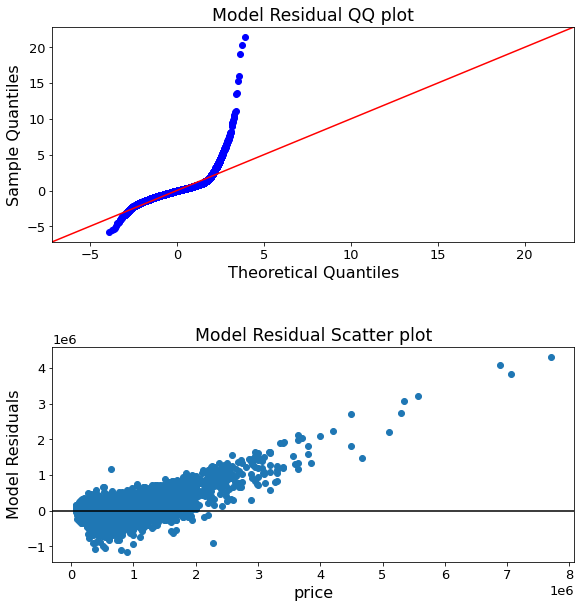

In [10]:
first_model = df.fill_na_mode(verbose=True  # Fill na for the model
        ).drop(['date', 'sqft_basement'], axis=1  # Dropping date and sqft_basement
        ).model_and_plot('price')   

<div class="shadow alert alert-success">
    <b>From the data:</b>
        <ul>
            <li>sqft_basement should be an int not an object</li>
            <li>id is irrelevant</li>
            <li>bedrooms, bathrooms, floors, view, condition, grade, and zipcode could be considered as categorical</li>
            <li> waterfront and yr_renovated are 11% and 17.9% null values, respectively.</li>
            <li>R-squared of .7 shows the residuals are not too far from the regression line</li>
            <li></li>
        </ul>
    </div>
    <style>
        box-shadow: 8px 8px 5px #444;
    </style>

<div class="titlebox">
    <h2>Scrubbing the data</h2>
</div>